# How to use the R package `arulesViz` from Python using `arulespy`

This document is also avaialble as a IPython notebook: https://github.com/mhahsler/arulespy/blob/main/examples/arulesViz.ipynb

The following may be necessary on Windows to set the 'R_HOME' for `rpy2` correctly:

In [15]:
# from rpy2 import situation
# import os
#
# os.environ['R_HOME'] = situation.r_home_from_registry()
# situation.get_r_home()

## Import Data and Mine Rules

Import the `arules` module from package `arulespy`.

In [16]:
from arulespy.arules import Transactions, parameters, apriori
from arulespy.arulesViz import plot, inspectDT

### Creating transaction data

We read [Zoo.cvs](Zoo.cvs) which contains the description of 101 animals containing nominal variables and one quantitative variable as a pandas dataframe.

In [17]:
import pandas as pd

df = pd.read_csv('https://mhahsler.github.io/arulespy/examples/Zoo.csv')
df

hair  feathers   eggs   milk  airborne  aquatic  predator  toothed  \
0     True     False  False   True     False    False      True     True   
1     True     False  False   True     False    False     False     True   
2    False     False   True  False     False     True      True     True   
3     True     False  False   True     False    False      True     True   
4     True     False  False   True     False    False      True     True   
..     ...       ...    ...    ...       ...      ...       ...      ...   
96    True     False  False   True     False    False     False     True   
97    True     False   True  False      True    False     False    False   
98    True     False  False   True     False    False      True     True   
99   False     False   True  False     False    False     False    False   
100  False      True   True  False      True    False     False    False   

     backbone  breathes  venomous   fins  legs   tail  domestic  catsize  \
0        True      True     False  False     4  False     False     True   
1        True      True     False  False     4   True     False     True   
2        True     False     False   True     0   True     False    False   
3        True      True     False  False     4  False     False     True   
4        True      True     False  False     4   True     False     True   
..        ...       ...       ...    ...   ...    ...       ...      ...   
96       True      True     False  False     2   True     False     True   
97      False      True      True  False     6  False     False    False   
98       True      True     False  False     4   True     False     True   
99      False      True     False  False     0  False     False    False   
100      True      True     False  False     2   True     False    False   

              type  
0           mammal  
1           mammal  
2             fish  
3           mammal  
4           mammal  
..             ...  
96          mammal  
97          insect  
98          mammal  
99   mollusc.et.al  
100           bird  

[101 rows x 17 columns]

Convert the pandas dataframe into a sparse transactions object.

In [18]:
trans = Transactions.from_df(df)
print(trans)

trans.as_df()

transactions in sparse format with
 101 transactions (rows) and
 25 items (columns)



items transactionID
1    {hair,milk,predator,toothed,backbone,breathes,...             0
2    {hair,milk,toothed,backbone,breathes,legs=[4,8...             1
3    {eggs,aquatic,predator,toothed,backbone,fins,l...             2
4    {hair,milk,predator,toothed,backbone,breathes,...             3
5    {hair,milk,predator,toothed,backbone,breathes,...             4
..                                                 ...           ...
97   {hair,milk,toothed,backbone,breathes,legs=[2,4...            96
98   {hair,eggs,airborne,breathes,venomous,legs=[4,...            97
99   {hair,milk,predator,toothed,backbone,breathes,...            98
100      {eggs,breathes,legs=[0,2),type=mollusc.et.al}            99
101  {feathers,eggs,airborne,backbone,breathes,legs...           100

[101 rows x 2 columns]

In [19]:
print(trans.itemInfo().to_markdown())

|    | labels             | variables   | levels        |
|---:|:-------------------|:------------|:--------------|
|  1 | hair               | hair        | TRUE          |
|  2 | feathers           | feathers    | TRUE          |
|  3 | eggs               | eggs        | TRUE          |
|  4 | milk               | milk        | TRUE          |
|  5 | airborne           | airborne    | TRUE          |
|  6 | aquatic            | aquatic     | TRUE          |
|  7 | predator           | predator    | TRUE          |
|  8 | toothed            | toothed     | TRUE          |
|  9 | backbone           | backbone    | TRUE          |
| 10 | breathes           | breathes    | TRUE          |
| 11 | venomous           | venomous    | TRUE          |
| 12 | fins               | fins        | TRUE          |
| 13 | legs=[0,2)         | legs        | [0,2)         |
| 14 | legs=[2,4)         | legs        | [2,4)         |
| 15 | legs=[4,8]         | legs        | [4,8]         |
| 16 | tail   

In [37]:
rules = apriori(trans,
                    parameter = parameters({"supp": 0.01, "conf": 0.7}), 
                    control = parameters({"verbose": False}))  

print(rules.as_df().round(2).to_markdown())

|       | LHS                                                                              | RHS              |   support |   confidence |   coverage |   lift |   count |
|------:|:---------------------------------------------------------------------------------|:-----------------|----------:|-------------:|-----------:|-------:|--------:|
|     1 | {}                                                                               | {tail}           |      0.74 |         0.74 |       1    |   1    |      75 |
|     2 | {}                                                                               | {breathes}       |      0.79 |         0.79 |       1    |   1    |      80 |
|     3 | {}                                                                               | {backbone}       |      0.82 |         0.82 |       1    |   1    |      83 |
|     4 | {type=amphibian}                                                                 | {aquatic}        |      0.04 |         1    |       

In [39]:
non_redundant_rules = rules[[not x for x in rules.is_redundant()]]
len(non_redundant_rules)

770

## Interactive Rules Table with HTML Widget

`arulesViz` can create interactive HTML widgets which can easily be integrated into a 
python notebook by saving the widget as a HTML fiel and including it using a IFrame.

In [7]:
from IPython.display import IFrame

import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

In [8]:
m = inspectDT(rules)
htmlwidgets.saveWidget(m, 'rules.html')

IFrame("rules.html", "100%", 600)

In [9]:
#webshot = packages.importr('webshot').webshot   
#webshot("rules.html", "rulesDT.png")

## arulesViz with ggplot

`arulesViz` provides `ggplot` as an drawing engine. `arulesViz.plot()` returns the `ggplot` object which can be
included in the notebook using `image_png()`. 

In [21]:
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

from arulespy.arulesViz import plot, inspectDT
ggsave = packages.importr('ggplot2').ggsave


R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



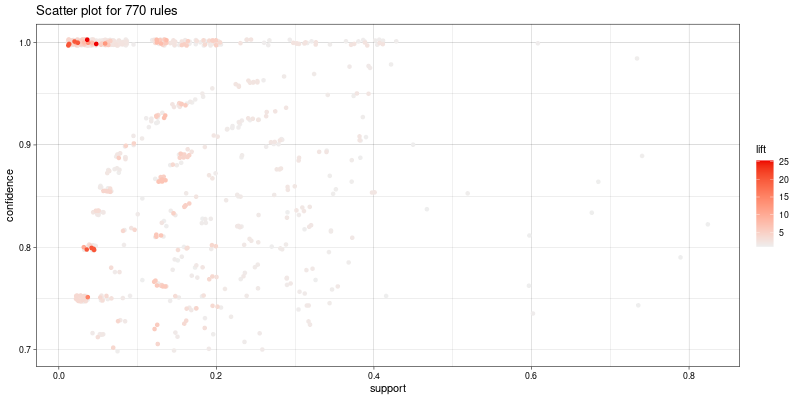

In [36]:

gg = plot(non_redundant_rules, method="scatter")
ggsave(gg, file="scatter.png", width=5, height=4)

image_png(gg)

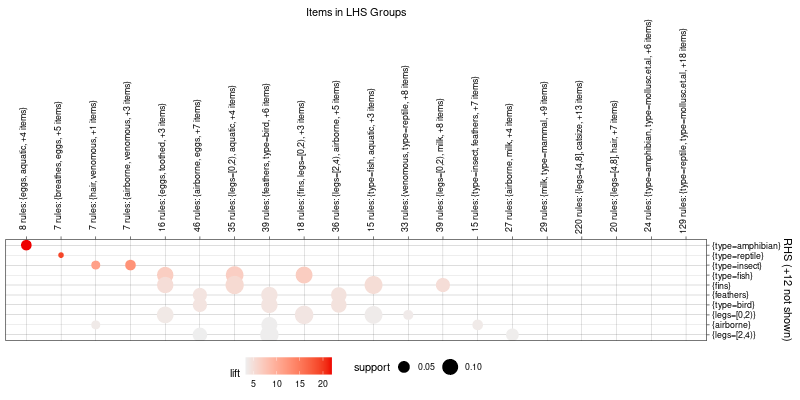

In [41]:
gg = plot(non_redundant_rules, method="grouped")
ggsave(gg, file="grouped.png", width=8, height=7)

image_png(gg)


In [53]:
rules.addQuality(rules.interestMeasure(["phi", "support"]))
rules.sort(by = "phi").as_df()

LHS            RHS   support  confidence  coverage      lift  \
43     {type=bird}     {feathers}  0.198020    1.000000  0.198020  5.050000   
44      {feathers}    {type=bird}  0.198020    1.000000  0.198020  5.050000   
78   {type=mammal}         {milk}  0.405941    1.000000  0.405941  2.463415   
79          {milk}  {type=mammal}  0.405941    1.000000  0.405941  2.463415   
294    {eggs,fins}    {type=fish}  0.128713    1.000000  0.128713  7.769231   
..             ...            ...       ...         ...       ...       ...   
104   {legs=[4,8]}     {backbone}  0.366337    0.725490  0.504950  0.882825   
109         {eggs}     {backbone}  0.415842    0.711864  0.584158  0.866245   
1               {}         {tail}  0.742574    0.742574  1.000000  1.000000   
2               {}     {breathes}  0.792079    0.792079  1.000000  1.000000   
3               {}     {backbone}  0.821782    0.821782  1.000000  1.000000   

     count       phi  
43      20  1.000000  
44      20  1.000000  
78      41  1.000000  
79      41  1.000000  
294     13  1.000000  
..     ...       ...  
104     37 -0.254119  
109     42 -0.340420  
1       75       NaN  
2       80       NaN  
3       83       NaN  

[30438 rows x 8 columns]

Saving 7 x 7 in image


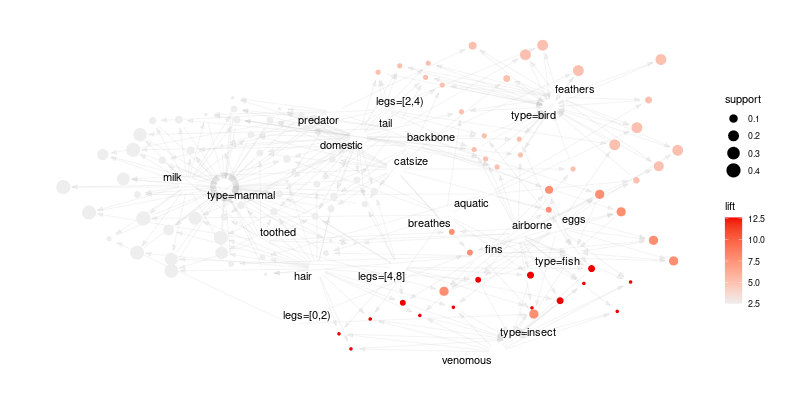

In [88]:
rules = rules[['type' in x for x in rules.rhs().labels()]]


rules_100 = rules.sort(by = 'confidence')[0:100]
gg = plot(rules_100, method="graph")
ggsave(gg, file="graph.png")

image_png(gg)

## arulesViz with HTML Widgets

In [14]:
from IPython.display import IFrame
import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

m = plot(rules_20, method="graph", engine="htmlwidget")
htmlwidgets.saveWidget(m, "graph.html", selfcontained = True)
IFrame("graph.html", "100%", 800)


NameError: name 'rules_20' is not defined

## Create Rules

To import rules from other tools or to create rules manually, rules for `arules` can be created from lists 
of sets of items. The item labels (i.e., the sparse representation) is
taken from the transactions `trans`.

In [ ]:
import rpy2.robjects as ro

new_rule_lhs = [
    arules.set(['hair', 'milk', 'predator']),
    arules.set(['hair', 'tail', 'predator']),
    arules.set(['fins'])
]
new_rule_rhs = [
    arules.set(['type=mammal']),
    arules.set(['type=mammal']),
    arules.set(['type=fish'])
]
                          
lhs = arules.encode(new_rule_lhs, itemLabels = trans)
rhs = arules.encode(new_rule_rhs, itemLabels = trans)

r = arules.new_Rules(lhs, rhs)
r.as_df()

LHS            RHS
1  {hair,milk,predator}  {type=mammal}
2  {hair,predator,tail}  {type=mammal}
3                {fins}    {type=fish}

Next, we add interest measures calculated on the transactions.

In [ ]:
arules.addQuality(r, arules.interestMeasure(r, ['support', 'confidence', 'lift'], trans))
r.as_df()

LHS            RHS   support  confidence      lift
1  {hair,milk,predator}  {type=mammal}  0.198020    1.000000  2.463415
2  {hair,predator,tail}  {type=mammal}  0.158416    1.000000  2.463415
3                {fins}    {type=fish}  0.128713    0.764706  5.941176

Fially, we can visualize the new rules as a graph.

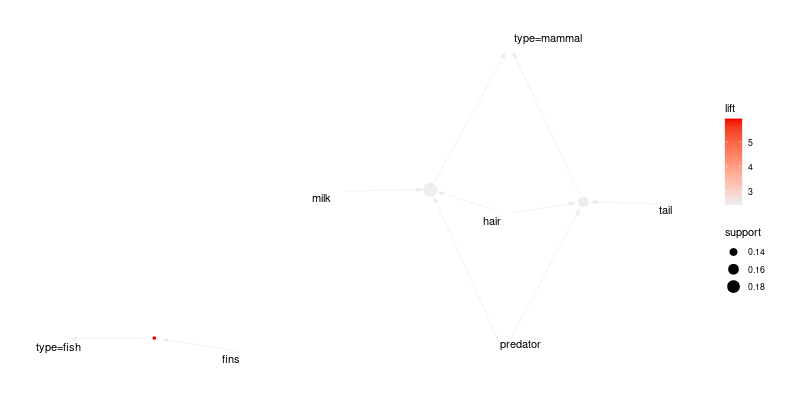

In [ ]:
gg = arulesViz.plot(r, method = "graph")
image_png(gg)